In [32]:
# importing libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from os.path import exists
import math


In [33]:
TRAIN_CSV = './train/train.csv'
DEPTH_CSV = 'depths.csv'

TRAIN_DIR  = 'D:/_0Luciano/_0PHD/datasets/tgs-salt/'
TRAIN_IMAGE_DIR = 'D:/_0Luciano/_0PHD/datasets/tgs-salt/train/images/'
TRAIN_MASK_DIR  = 'D:/_0Luciano/_0PHD/datasets/tgs-salt/train/masks/'
TEST_IMAGE_DIR  = 'D:/_0Luciano_0PHD/datasets/tgs-salt/test/images/'

In [34]:
df_train = pd.read_csv(TRAIN_CSV)
df = df_train
df['salt'] = df['rle_mask'].notnull().replace([False, True], [0,1]) #0 = no_salt #1 = salt
salt = df[df['rle_mask'].notnull()]
df.head()

,id,rle_mask,salt
0,575d24d81d,NaN,0
1,a266a2a9df,5051 5151,1
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,1
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,1
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,1


In [35]:
df.head()

,id,rle_mask,salt
0,575d24d81d,NaN,0
1,a266a2a9df,5051 5151,1
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,1
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,1
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,1


In [36]:
def limites(msk):
        number_of_white_pix = np.sum(msk == 255)
        result = (number_of_white_pix>=(10201*0.1)) & (number_of_white_pix<(10201*0.9))
        return result

def coverage(label):
        path = TRAIN_MASK_DIR + f'{label}.png'
        white_pix = -1
        if exists(path):
                mask = cv2.imread(path)
                gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
                white_pix = np.sum(gray == 255)/(101*101)
        return white_pix

In [37]:

 # a coluna coverage em todas as linhas do df recebe o resultado da função coverage(id)
df['coverage']=df['id'].map(coverage)

In [38]:
# = 0.993333986864033
coverage('75efad62c1')

0.993333986864033

In [39]:
def cov_to_class(val):    
    for i in range(0, 11):
        if 10*val <= i :
            return i

def tru(x):
    return math.trunc(10*x)        


In [40]:
#df["coverage_class"] = df.coverage.map(cov_to_class)
df["coverage_class"] = df.coverage.map(tru)

In [41]:
df.columns

Index(['id', 'rle_mask', 'salt', 'coverage', 'coverage_class'], dtype='object')

In [42]:
df.head(10)


,id,rle_mask,salt,coverage,coverage_class
0,575d24d81d,NaN,0,0.000000,0
1,a266a2a9df,5051 5151,1,0.504950,5
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...,1,0.993334,9
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,1,0.149201,1
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...,1,0.042839,0
5,782ae9b7e7,1 1815 1819 90 1920 81 2021 73 2122 64 2223 55...,1,0.225370,2
6,9842f69f8d,NaN,0,0.000000,0
7,aa94cfb806,1 28 102 28 203 29 304 30 405 32 506 33 607 34...,1,0.665817,6
8,50d3073821,1 2121 9293 909,1,0.297030,2
9,28f865caaa,NaN,0,0.000000,0


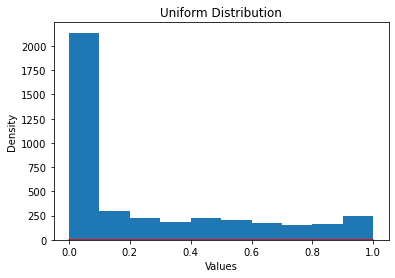

array([0.        , 0.0999902 , 0.19998039, 0.29997059, 0.39996079,
       0.49995099, 0.59994118, 0.69993138, 0.79992158, 0.89991177,
       0.99990197])

In [43]:
count, bins, ignored = plt.hist(df['coverage'], 10, density=False)
plt.plot(bins, np.ones_like(bins),color='r')
plt.title('Uniform Distribution')
plt.ylabel('Density')
plt.xlabel('Values')
plt.show()
bins

In [44]:
dfTrain1090=df.loc[(df['coverage_class'] >= 1) & (df['coverage_class'] <= 8)]

In [45]:
dfTrain1090.columns

Index(['id', 'rle_mask', 'salt', 'coverage', 'coverage_class'], dtype='object')

In [62]:
dfTrain1090.head(10)

,id,rle_mask,coverage_class
0,a266a2a9df,5051 5151,5
1,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,1
2,782ae9b7e7,1 1815 1819 90 1920 81 2021 73 2122 64 2223 55...,2
3,aa94cfb806,1 28 102 28 203 29 304 30 405 32 506 33 607 34...,6
4,50d3073821,1 2121 9293 909,2
5,b5e1371b3b,75 27 175 28 275 29 374 31 474 32 574 33 674 3...,7
6,b45ad3932e,49 11 149 11 249 11 351 10 452 9 553 9 654 8 7...,2
7,d4d34af4f7,8788 1414,1
8,302ea1ac81,6 96 108 95 210 94 311 94 413 93 515 92 615 93...,5
9,40dcff68b3,3536 4 3637 20 3738 36 3839 53 3940 70 4041 86...,6


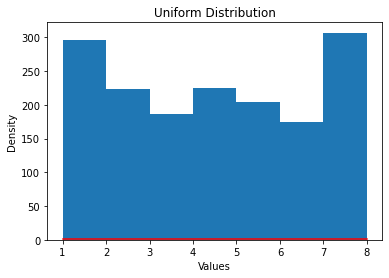

array([1., 2., 3., 4., 5., 6., 7., 8.])

In [47]:
count, bins, ignored = plt.hist(dfTrain1090['coverage_class'], 7, density=False)
plt.plot(bins, np.ones_like(bins),color='r')
plt.title('Uniform Distribution')
plt.ylabel('Density')
plt.xlabel('Values')
plt.show()
bins

In [48]:
dfTrain1090 = dfTrain1090.drop(columns=['salt' ,'coverage'])

In [61]:

dfTrain1090.reset_index(drop=True, inplace=True)



In [63]:
dfTrain1090.columns

Index(['id', 'rle_mask', 'coverage_class'], dtype='object')

In [ ]:
df.drop(df.columns[cols],axis=1,inplace=True)

In [58]:
path = TRAIN_DIR + f'train1090.csv'
path

'D:/_0Luciano/_0PHD/datasets/tgs-salt/train1090.csv'

In [60]:
dfTrain1090

,id,rle_mask,coverage_class
0,a266a2a9df,5051 5151,5
1,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...,1
2,782ae9b7e7,1 1815 1819 90 1920 81 2021 73 2122 64 2223 55...,2
3,aa94cfb806,1 28 102 28 203 29 304 30 405 32 506 33 607 34...,6
4,50d3073821,1 2121 9293 909,2
...,...,...,...
1612,0530b67189,3938 2 4032 9 4127 15 4221 22 4310 34 4398 47 ...,5
1613,e8d8b35601,79 11 177 13 276 14 375 15 474 16 573 18 672 1...,4
1614,a7cfa30d35,1 84 102 83 203 81 304 79 405 77 506 75 607 73...,1
1615,caa039b231,2398 7 2499 11 2600 16 2700 22 2801 26 2901 29...,3


In [59]:
dfTrain1090.to_csv(path,index=False)

In [21]:
path

'D:/_0Luciano/_0PHD/datasets/tgs-salt/train1090.csv'

In [22]:
dfTrain1090

,id,coverage_class
0,a266a2a9df,5
1,34e51dba6a,1
2,782ae9b7e7,2
3,aa94cfb806,6
4,50d3073821,2
...,...,...
1612,0530b67189,5
1613,e8d8b35601,4
1614,a7cfa30d35,1
1615,caa039b231,3


In [115]:
rand_idx = np.random.randint(0, 1000, 10) #generate 10 random indexes from 0 to 4000

In [102]:
fig = plt.figure(figsize=(20, 5))
for i,file in enumerate(rand_idx):
    figs = dfTrain1090['id'][file]
    path = TRAIN_MASK_DIR + f'{figs}.png'
    mask = cv2.imread(path)
    msk = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    print (i+1, limites(msk) )

1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True


<Figure size 1440x360 with 0 Axes>

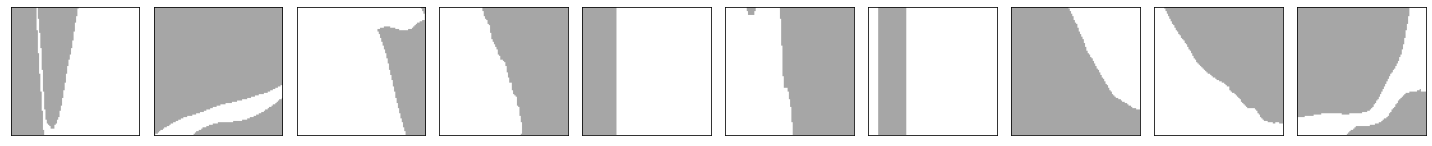

In [116]:
#check sample image
fig = plt.figure(figsize=(20, 5))
for i,file in enumerate(rand_idx):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks = [])
    figs = dfTrain1090['id'][file]
    filepath = TRAIN_MASK_DIR + f'{figs}.png'
    mask = mpimg.imread(filepath)
    ax.imshow(mask, alpha=0.35, cmap='gray')
plt.tight_layout()
plt.show()


In [106]:
file = 2906
figs=df['id'][file]
img = mpimg.imread(TRAIN_IMAGE_DIR+f'{figs}.png')
mask = cv2.imread(TRAIN_MASK_DIR+f'{figs}.png')

In [108]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
msk = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

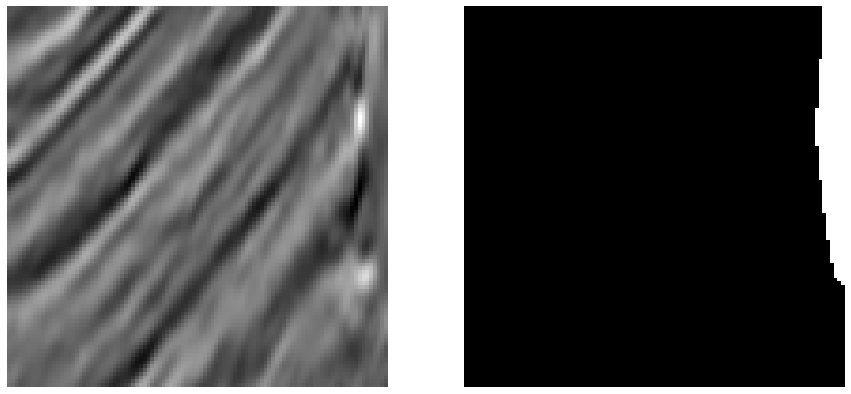

In [110]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1); plt.imshow(img);  plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(msk,cmap='gray',); plt.axis('off')
plt.show()